In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import joblib

In [180]:
target = pd.read_csv('Chess_Target_Winner.csv')
data_df = pd.read_csv('Clean_Chess_Features_Data.csv')

In [181]:
decoded_data = data_df.copy()

In [182]:
label_encoded = joblib.load('label_encoder.pkl')
ordinal_encoded = joblib.load('ordinal_encoder.pkl')

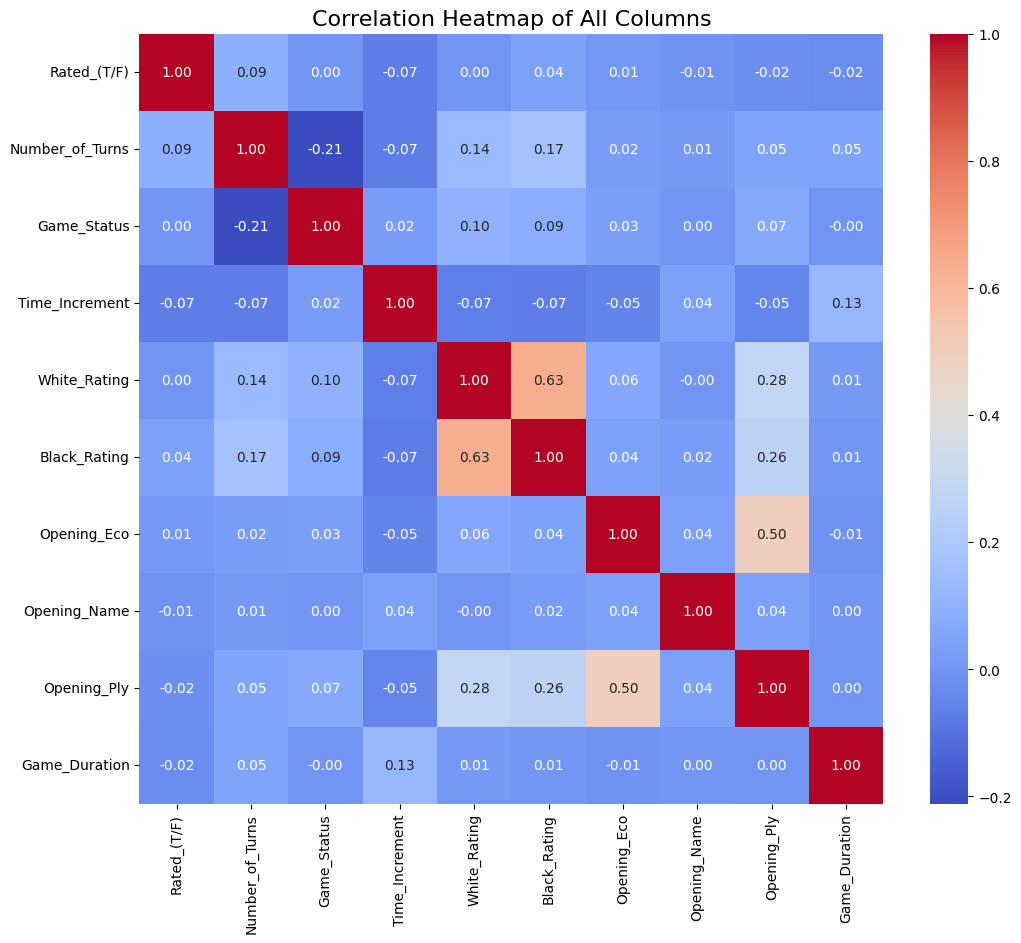

In [183]:
# Assuming 'df' is your DataFrame with numerical data
# Step 1: Compute correlation matrix
correlation_matrix = data_df.corr()

# Step 2: Plot heatmap
plt.figure(figsize=(12, 10))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Step 3: Customize and show plot
plt.title("Correlation Heatmap of All Columns", fontsize=16)
plt.show()

In [184]:
data_df.columns

Index(['Rated_(T/F)', 'Number_of_Turns', 'Game_Status', 'Time_Increment',
       'White_Rating', 'Black_Rating', 'Opening_Eco', 'Opening_Name',
       'Opening_Ply', 'Game_Duration'],
      dtype='object')

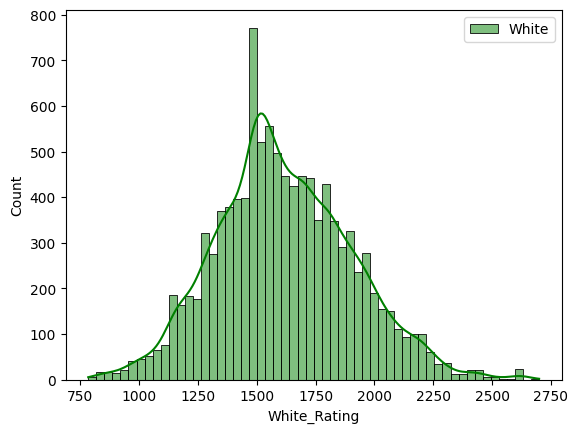

In [185]:
sns.histplot(data_df['White_Rating'], kde=True, color='green', label='White')
plt.legend()

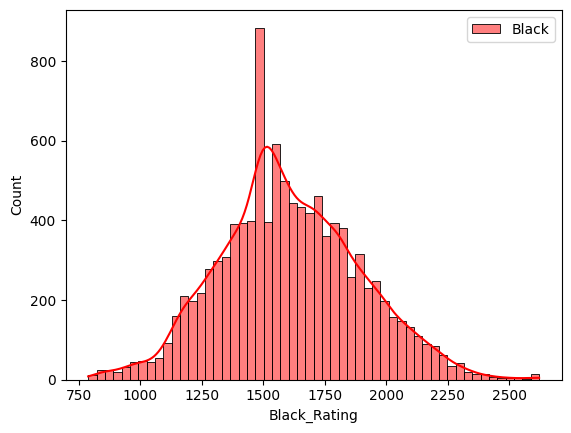

In [186]:
sns.histplot(data_df['Black_Rating'], kde=True, color='red', label='Black')
plt.legend()

<Axes: xlabel='Winner', ylabel='count'>

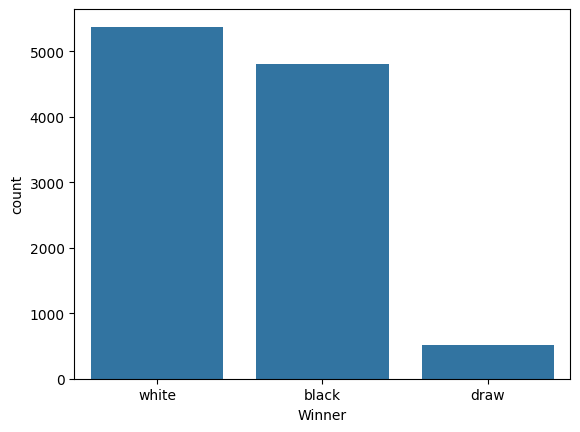

In [187]:
sns.countplot(data=data_df, x=target['Winner'])

<Axes: xlabel='Winner', ylabel='White_Rating'>

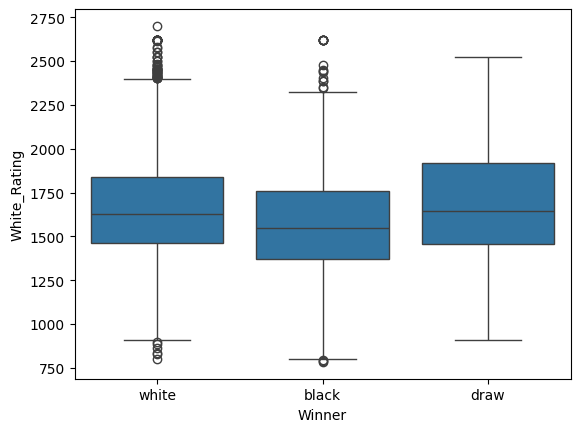

In [188]:
sns.boxplot(data=data_df, x=target['Winner'], y='White_Rating')

<Axes: xlabel='Winner', ylabel='Black_Rating'>

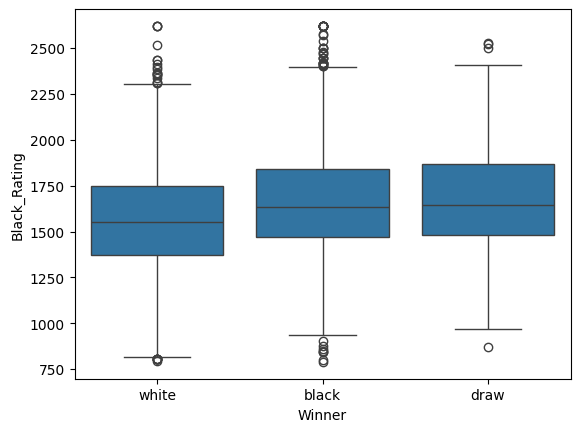

In [189]:
sns.boxplot(data=data_df, x=target['Winner'], y='Black_Rating')

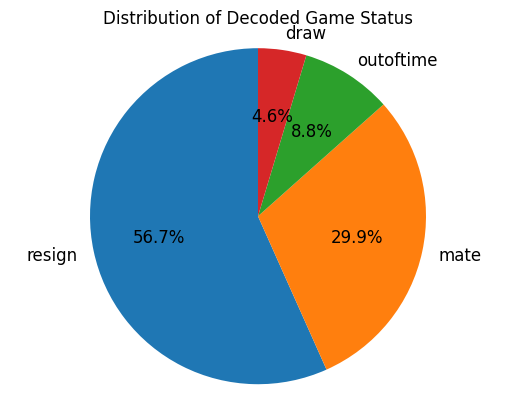

In [190]:
decoded_game_status = ordinal_encoded.inverse_transform(data_df[['Game_Status']])

# Update the DataFrame with the decoded values
decoded_data['Decoded_Game_Status'] = decoded_game_status.flatten()  # Flatten to 1D array

# Now you can use the decoded labels in your pie chart
game_status_counts = decoded_data['Decoded_Game_Status'].value_counts()

# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(game_status_counts, 
                                  labels=game_status_counts.index, 
                                  autopct='%1.1f%%', 
                                  startangle=90, 
                                  textprops={'fontsize': 12})

ax.axis('equal')  
plt.title('Distribution of Decoded Game Status')
plt.show()

<Axes: xlabel='Time_Increment', ylabel='Game_Duration'>

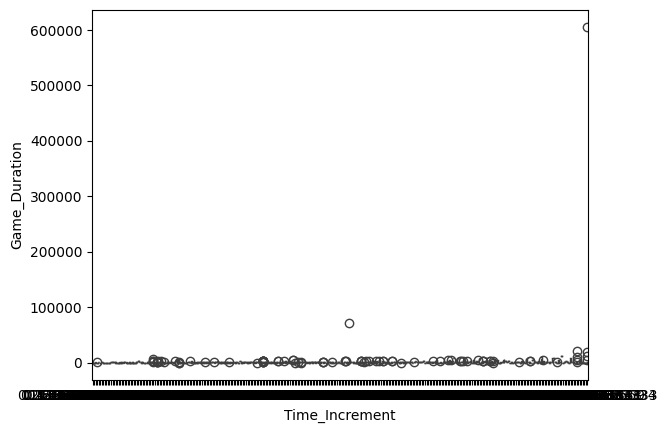

In [191]:
sns.boxplot(data=data_df, x='Time_Increment', y='Game_Duration')

c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: ylabel='Decoded_Opening_Name'>

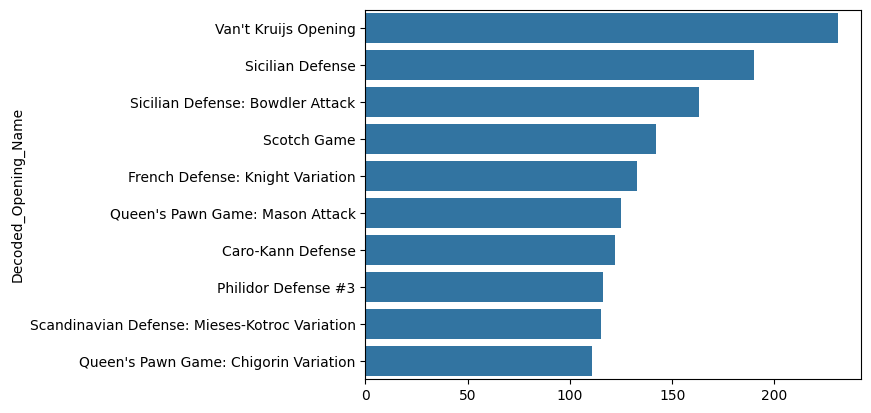

In [192]:
Decoded_Opening_Name = label_encoded.inverse_transform(data_df[['Opening_Name']])
decoded_data['Decoded_Opening_Name'] = Decoded_Opening_Name
top_openings = decoded_data['Decoded_Opening_Name'].value_counts().head(10).T
sns.barplot(x=top_openings.values, y=top_openings.index)

<Axes: xlabel='Opening_Ply', ylabel='White_Rating'>

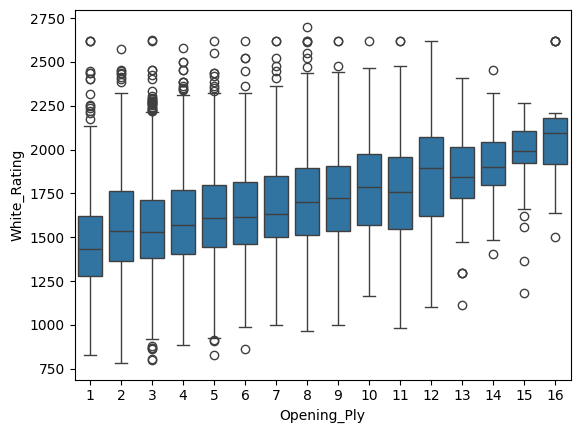

In [193]:
sns.boxplot(data=data_df, x='Opening_Ply', y='White_Rating')

In [194]:
data_df.columns

Index(['Rated_(T/F)', 'Number_of_Turns', 'Game_Status', 'Time_Increment',
       'White_Rating', 'Black_Rating', 'Opening_Eco', 'Opening_Name',
       'Opening_Ply', 'Game_Duration'],
      dtype='object')

<Axes: xlabel='Number_of_Turns', ylabel='Count'>

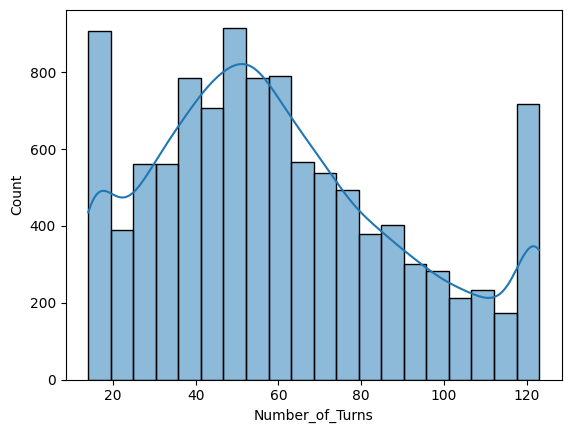

In [195]:
sns.histplot(data_df['Number_of_Turns'], kde=True, bins=20)

<Axes: xlabel='White_Rating', ylabel='Black_Rating'>

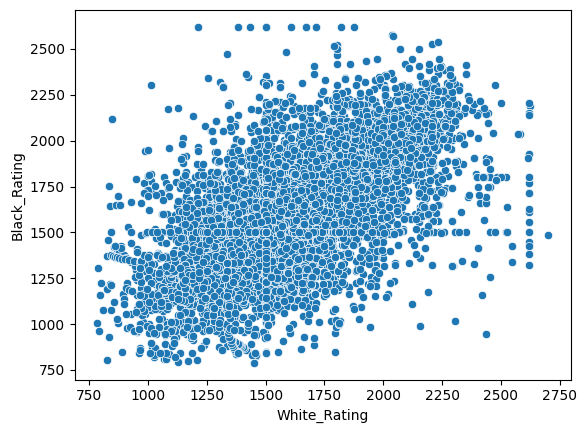

In [196]:
sns.scatterplot(data=data_df, x='White_Rating', y='Black_Rating')

<Axes: xlabel='Number_of_Turns', ylabel='Game_Duration'>

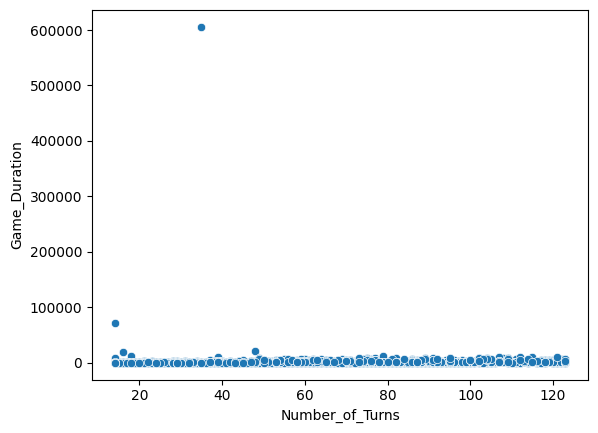

In [197]:
sns.scatterplot(data=data_df, x='Number_of_Turns', y='Game_Duration')

<Axes: xlabel='Opening_Name', ylabel='count'>

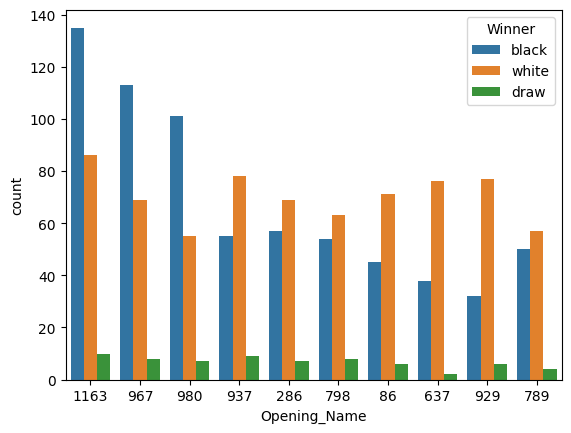

In [204]:
sns.countplot(data=data_df, x='Opening_Name', hue=target['Winner'], order=data_df['Opening_Name'].value_counts().iloc[:10].index)